In [1]:
import gym
import agent as myagent
import utils

In [8]:
env = gym.make("CartPole-v0")
seed = 0
train_session = None

In [9]:
num_action = env.action_space.n
dim_state = env.observation_space.shape[0]

In [10]:
nn_archi = [{'type': 'linear', 'in': dim_state, 'out': 32, 'activation': 'relu', 'kwargs': {}}, 
                {'type': 'linear', 'in': 32, 'out': num_action, 'activation': 'softmax', 'kwargs': {'dim': 0}}]
agent_init = {
    'seed': seed,
    'num_action': num_action,
    'discount_factor': .99,
    'nn_archi': nn_archi,
    'optimizer': {'lr': 1e-4}
}

In [11]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [12]:
parameter_grid = {('discount_factor', ): [.95, .99]}
agent_names = train_session.parameter_grid_append(myagent.REINFORCEAgent, agent_init, parameter_grid)
s = '\n- '.join(agent_names)
print(f"Agents added: \n- {s}")

Agents added: 
- discount_factor:0.95;
- discount_factor:0.99;


In [20]:
n_episode = 5
t_max_per_episode = 1000
graphical = True

In [21]:
train_session.train(n_episode=n_episode, graphical=graphical)

100%|██████████| 5/5 [00:16<00:00,  3.33s/it]


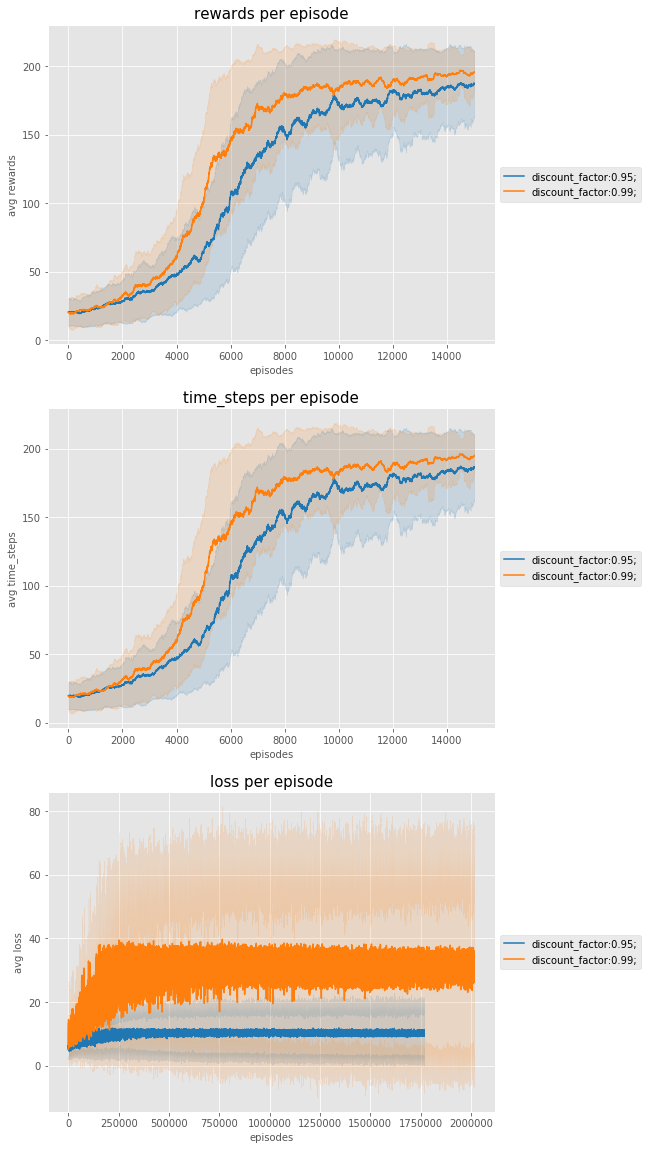

In [22]:
train_session.plot_results(window=250, agent_subset=agent_names)

In [11]:
env.close()